## Компьютерный практикум №5. ROC-анализ

<p style="text-indent: 25px;">
    Доброго времени суток, <b>Елена Константиновна</b>!
</p>
<p style="text-indent: 25px;">
    Задания в данной лабораторной следующие:
    <ol>
        <li><i>Сгенерировать данные.</i></li>
        <li><i>Реализовать алгоритм нахождения порогового значения с помощью ROC-анализа.</i></li>
        <li><i>Вывести таблицу значений чувствительности и специфичности для каждого возможного порогового значения.</i></li>
        <li><i>Вывести оптимальный порог за каждым из трех критериев.</i></li>
        <li><i>Вывести график РОК-кривой и посчитать площадь под ней.</i></li>
        <li><i>Сделать выводы.</i></li>
    </ol>
</p>
<p style="text-indent: 25px;">
    Прежде чем приступить к заданиям, для начала импортируем необходимые библиотеки.
</p>

### 1. Импортирование библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import copy

### 2. Генерация данных

In [122]:
# первая переменная
x = np.random.randint(low=10, high=100, size=50)
x

array([25, 96, 35, 16, 47, 64, 63, 68, 39, 32, 47, 12, 17, 37, 77, 58, 54,
       72, 69, 71, 75, 54, 17, 81, 59, 83, 55, 29, 30, 63, 18, 68, 64, 56,
       59, 73, 55, 15, 86, 72, 78, 49, 71, 20, 18, 33, 31, 62, 92, 80])

In [123]:
y = []
for i in x:
    if i <= 40:
        y.append(0)
    elif i >= 60:
        y.append(1)
    else:
        y.append(np.random.randint(low=0, high=2))

In [124]:
data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,25,0
1,96,1
2,35,0
3,16,0
4,47,0
5,64,1
6,63,1
7,68,1
8,39,0
9,32,0


### 3. Пороги

In [125]:
res = []
temp_data = data.copy()
for side in range(2):
    for i in range(1, 101):
        if side == 0:
            pred_y = np.where(temp_data['x'].values < i, 0, 1)
        else:
            pred_y = np.where(temp_data['x'].values >= i, 0, 1)
        temp_data['pred']= pred_y == temp_data['y'].values 
        TP = temp_data[(temp_data['y'] == 0)&(temp_data['pred'] == True)].shape[0]
        FP = temp_data[(temp_data['y'] == 0)&(temp_data['pred'] == False)].shape[0]
        FN = temp_data[(temp_data['y'] == 1)&(temp_data['pred'] == False)].shape[0]
        TN = temp_data[(temp_data['y'] == 1)&(temp_data['pred'] == True)].shape[0]
        try:
            sens = TP / (TP + FN)
        except:
            sens = 0
        try:
            spec = TN / (TN + FP)
        except:
            spec = 0
        res.append([i, side, sens, spec])
resdf = pd.DataFrame(res, columns=['threshold', 'side', 'sensitivity', 'specificity'])
resdf

,threshold,side,sensitivity,specificity
0,1,0,0.0,0.520000
1,2,0,0.0,0.520000
2,3,0,0.0,0.520000
3,4,0,0.0,0.520000
4,5,0,0.0,0.520000
5,6,0,0.0,0.520000
6,7,0,0.0,0.520000
7,8,0,0.0,0.520000
8,9,0,0.0,0.520000
9,10,0,0.0,0.520000


In [126]:
resdf.sort_values(by=['specificity', 'sensitivity'], ascending=[False,False])
# лучшие варианты - 60, 61, 62. Возьмем 60

,threshold,side,sensitivity,specificity
59,60,0,0.857143,1.0
60,61,0,0.857143,1.0
61,62,0,0.857143,1.0
62,63,0,0.827586,1.0
63,64,0,0.774194,1.0
64,65,0,0.727273,1.0
65,66,0,0.727273,1.0
66,67,0,0.727273,1.0
67,68,0,0.727273,1.0
68,69,0,0.685714,1.0


In [127]:
y_pred = np.where(data['x'].values < 60, 0, 1)
data['y_pred'] = y_pred
data

,x,y,y_pred
0,25,0,0
1,96,1,1
2,35,0,0
3,16,0,0
4,47,0,0
5,64,1,1
6,63,1,1
7,68,1,1
8,39,0,0
9,32,0,0


### 4. ROC-AUC кривая

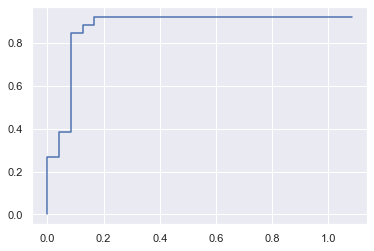

In [139]:
data = data.sort_values(by=['y_pred'], ascending=True)
data = data.reset_index(drop=True)
lon, lat = 0, 0
yeeeerock = [[lon, lat]]
for i in range(data.shape[0]):
    if data.iloc[i]['y'] == 0:
        lat += 1
    else:
        lon += 1
    yeeeerock.append([lon, lat])
res = pd.DataFrame(yeeeerock, columns=['x', 'y'])
res['x'] = res['x'] / np.sum(data['y'] == 0)
res['y'] = res['y'] / np.sum(data['y'] == 1)
plt.plot(res['x'], res['y']) 

In [142]:
auc = 0
for i in range(res.shape[0] - 1):
    obj1 = res.iloc[i]
    obj2 = res.iloc[i + 1]
    auc += ((obj1['y'] + obj2['y']) / 2) * (obj2['x'] - obj1['x'])
print('Площадь под кривой:', auc)

Площадь под кривой: 0.9455128205128206


### Выводы

<p style="text-indent: 25px;">
    В результате выполненной лабораторной работы был применен ROC-AUC анализ для оценки бинарной классификации данных. Был найден оптимальный порог, после чего для результата классификации была получена ROC кривая, а также посчитана площадь под кривой. Площадь равняется 0.946, что свидетельствует об "отличной" классификации.
</p>